In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../data/german_credit.csv')

sns.set_theme()

##### Scatterplots showing creditability vs age and credit amount for each gender

In [ ]:
c = 'Sex & Marital Status'
df.loc[(df[c] == 1) | (df[c] == 2) | (df[c] == 3), 'Sex'] = 0
df.loc[(df[c] == 4), 'Sex'] = 1

sns.relplot(data=df, x="Age (years)", y="Credit Amount", col="Sex", hue="Creditability")

##### Violin graph showing creditability proportions for each variable value

In [ ]:
df = pd.read_csv('../data/german_credit_proc.csv')

columns = df.columns.values.tolist()
datas = {}
data_columns = {}

for i in range(len(columns)):
if columns[i] == 'Creditability':
    continue

max_val = df[columns[i]].max()

if max_val not in datas:
    datas[max_val] = {}
    datas[max_val][0] = []
    datas[max_val][1] = []
    data_columns[max_val] = []

datas[max_val][0].append(df[df['Creditability'] == 0][columns[i]])
datas[max_val][1].append(df[df['Creditability'] == 1][columns[i]])
data_columns[max_val].append(columns[i])

for key in datas:
    labels = []
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.set_yticklabels(data_columns[key])
    pos = [i + 1 for i in range(len(data_columns[key]))]

    violin = ax.violinplot(datas[key][0], pos, vert=False)
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), 'Creditability = 0'))

    violin = ax.violinplot(datas[key][1], pos, vert=False)
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), 'Creditability = 1'))

    plt.yticks(pos, data_columns[key])
    plt.legend(*zip(*labels), loc=2)
    plt.tight_layout()
    plt.show()


##### Principal components analysis and plots

<AxesSubplot:>

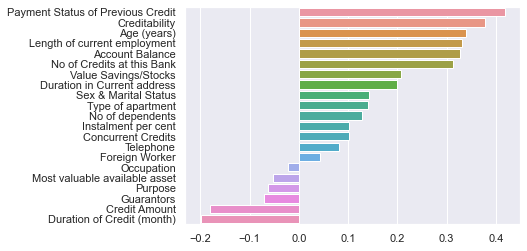

In [50]:
from sklearn import decomposition, preprocessing
import matplotlib.pyplot as plt

std_df = (df-df.mean())/df.std()

pca = decomposition.PCA(n_components=2)
data_proj = pca.fit_transform(std_df)

pc_df = pd.DataFrame(data_proj, columns=['PC1', 'PC2'])
pc_df = (pc_df-pc_df.min())/(pc_df.max()-pc_df.min())

# sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue=df['Creditability'])

# sns.barplot(x=pca.components_[0], y=df.columns.values.tolist(), order=[x for _, x in sorted(zip(pca.components_[0], df.columns.values.tolist()), reverse=True)])

sns.barplot(x=pca.components_[1], y=df.columns.values.tolist(), order=[x for _, x in sorted(zip(pca.components_[1], df.columns.values.tolist()), reverse=True)])


##### Discretización de edad, crédito y duración

In [8]:
df['Duration of Credit (month)'].quantile(q=[0.25, 0.5, 0.75])
df['Credit Amount'].quantile(q=[0.25, 0.5, 0.75])
df['Age (years)'].quantile(q=[0.25, 0.5, 0.75])

def categorize(column, q1, q2, q3):
    df.loc[df[column] < q1, column] = 0
    df.loc[(df[column] >=q1) & (df[column] <q2), column] = 1
    df.loc[(df[column] >=q2) & (df[column] <q3), column] = 2
    df.loc[df[column] >=q3, column] = 3

categorize('Duration of Credit (month)', 12, 18, 24)
categorize('Credit Amount', 1365.5, 2319.5, 3972.25)
categorize('Age (years)', 27, 33, 42)

df.to_csv('../data/german_credit_proc.csv', index=False)